In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numba import jit

## 4$^{th}$ order Runge-Kutta for Coupled 3 ODE system


Here,
$$
y_1 = f(\eta)
\\
y_2 = f'(\eta)
\\
y_3 = f''(\eta)
$$

We use the ODE
$$
ff^{''} + 2f^{'''} = 0 
$$

Which we then convert to a system of three ODEs
$$
\frac{df}{d \eta} = f' 
\\
\frac{df'}{d \eta} = f''
\\
\frac{df''}{d \eta} = f''' =  \frac{-ff''}{2}\\ \text{which we get from the original ODE}
$$

We will call the functions for these derivative as $f_1, f_2, f_3$ respecively

In [2]:
@jit(nopython = True)
def RK4C3(x, y1, y2, y3, h):
        
    #### Predictor section
    a = h * np.array([f1(x        , y1           , y2, y3)                      ,
                      f2(x        , y1           , y2, y3)                      ,
                      f3(x        , y1           , y2, y3)])                          ### All the K1s
    ################################################################################
    b = h * np.array([f1(x        , y1 + a[0] / 2, y2 + a[1] / 2, y3 + a[2] / 2),
                      f2(x + h / 2, y1 + a[0] / 2, y2 + a[1] / 2, y3 +a [2] / 2),
                      f3(x + h / 2, y1 + a[0] / 2, y2 + a[1] / 2, y3 + a[2] / 2)]) ### All the K2s
    ################################################################################
    c = h * np.array([f1(x        , y1 + b[0] / 2, y2 + b[1] / 2, y3 + b[2] / 2),
                      f2(x + h / 2, y1 + b[0] / 2, y2 + b[1] / 2, y3 + b[2] / 2),
                      f3(x + h / 2, y1 + b[0] / 2, y2 + b[1] / 2, y3 + b[2] / 2)]) ### All the K3s
    ################################################################################
    d = h * np.array([f1(x, y1 + c[0], y2 + c[1], y3 + c[2])                    ,
                      f2(x + h, y1 + c[0], y2 + c[1], y3 + c[2])                ,
                      f3(x+h, y1+c[0], y2+c[1], y3+c[2])])         ### All the K4s
    ################################################################################
    #### Corrector Section
    y32 = y3 + 1 / 6 * (a[2] + 2 * (b[2] + c[2]) + d[2])
    y22 = y2 + 1 / 6 * (a[1] + 2 * (b[1] + c[1]) + d[1])
    y12 = y1 + 1 / 6 * (a[0] + 2 * (b[0] + c[0]) + d[0])
    ################################################################################
    return y12, y22, y32

In [3]:
@jit(nopython = True)
def f1(x, y1, y2, y3):
    return y2

@jit(nopython = True)
def f2(x, y1, y2, y3):
    return y3

@jit(nopython = True)
def f3(x, y1, y2, y3):
    return - y1 * y3 /2

In [4]:
#@jit(nopython = True)
def solve(etaMax, steps, Y0, Y1, Y2):
    eta, h = np.linspace(0, etaMax, steps, retstep = True)
    y0  = np.zeros_like(eta)
    y1  = np.zeros_like(eta)
    y2  = np.zeros_like(eta)
    #K1  = np.zeros_like(eta)
    #K2  = np.zeros_like(eta)
    #K3  = np.zeros_like(eta)
    #K4  = np.zeros_like(eta)
    #L1  = np.zeros_like(eta)
    #L2  = np.zeros_like(eta)
    #L3  = np.zeros_like(eta)
    #L4  = np.zeros_like(eta)
    #M1  = np.zeros_like(eta)
    #M2  = np.zeros_like(eta)
    #M3  = np.zeros_like(eta)
    #M4  = np.zeros_like(eta)
    #format_row = "{:<25}" * (4)
    #print(format_row.format("eta", "f(eta)","f'(eta)", "f''(eta)"))
    ## Setting initial Conditions
    y0[0] = Y0
    y1[0] = Y1
    y2[0] = Y2
    
    for i in range(len(eta) - 1):
        
        y0[i+1], y1[i+1], y2[i+1] = RK4C3(eta[i], y0[i], y1[i], y2[i], h)
        
        #y0[i+1], y1[i+1], y2[i+1], K1[i], K2[i], K3[i], K4[i], L1[i], L2[i], L3[i], L4[i], M1[i], M2[i], M3[i], M4[i] = RK4BL(eta[i], y0[i], y1[i], y2[i], h)
        
        #print(format_row.format(eta[i], y0[i], y1[i], y2[i]))
    print("stepsize = ",h)
    #a, a, a, K1[-1], K2[-1], K3[-1], K4[-1], L1[-1], L2[-1], L3[-1], L4[-1], M1[-1], M2[-1], M3[-1], M4[-1] = RK4BL(eta[-1], y0[-1], y1[-1], y2[-1], h)
    return eta, y0, y1, y2#, K1, K2, K3, K4, L1, L2, L3, L4, M1, M2, M3, M4

The boundary conditions are:
$$
f'(0) = 0
\\
f(0) = 0
\\
f'(\infty) = 1
$$

To convert the last B.C. into an initial condition for $f''$, we will use:
$$
f''(0) = \big[\lim_{\eta \to \infty}F'(\eta) \big]^{-3/2}
$$

Where $F(\eta)$ is a solution of the same Blasius ODE, but satisfies the initail conditions:
$$
F'(0) = 0
\\
F(0) = 0
\\
F''(0) = 1
$$

We will be taking $\lim_{\eta \to \infty}F'(\eta) = F'(\eta = 10)$



Solving for $F(\eta)$:

In [5]:
Y1 = 0
Y2 = 0
Y3 = 0.45
eta_max = 10
steps = 1001
eta, a1, a2, a3 = solve(eta_max, steps, Y1, Y2, Y3)

stepsize =  0.01


(0, 3)

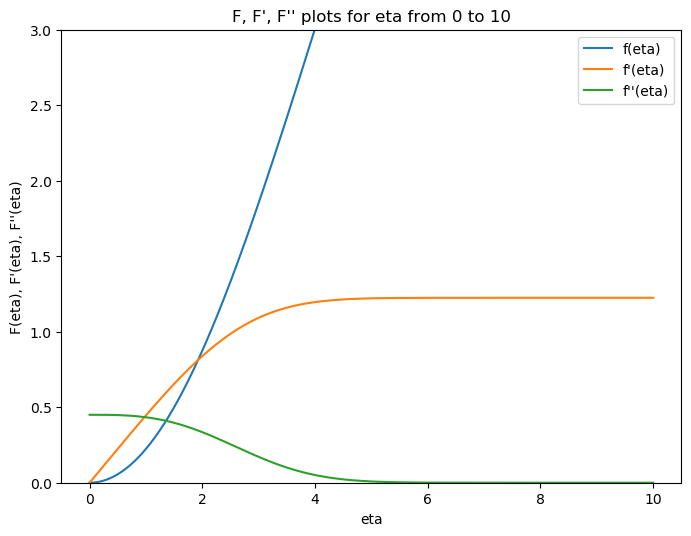

In [6]:
fig = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(eta, a1, label = 'f(eta)')
plt.plot(eta, a2, label = "f'(eta)")
plt.plot(eta, a3, label = "f''(eta)")
plt.title("F, F', F'' plots for eta from 0 to 10")
plt.xlabel("eta")
plt.ylabel("F(eta), F'(eta), F''(eta)")
plt.legend()
plt.ylim(0,3)

Using this, we can now write 
$$
f''(\eta) = \big[\lim_{\eta \to \infty}F'(\eta)\big]^{-3/2} = \big[F'(\eta = 10)\big]^{-3/2}
$$

In [7]:
##New initial conditions##
Y1 = 0
Y2 = 0
Y3 = a2[-1] ** ((- 3) / 2)
eta_max = 10
steps = 2001
eta, f1, f2, f3 = solve(eta_max, steps, Y1, Y2, Y3)
print("initial condition f''(0) = ",Y3)

stepsize =  0.005
initial condition f''(0) =  0.7379051916102292


(0, 3)

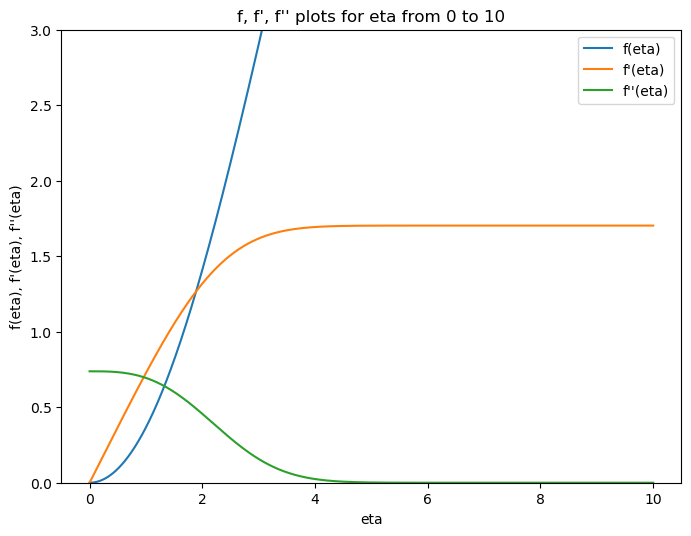

In [8]:
fig = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(eta, f1, label = 'f(eta)')
plt.plot(eta, f2, label = "f'(eta)")
plt.plot(eta, f3, label = "f''(eta)")
plt.legend()
plt.xlabel("eta")
plt.ylabel("f(eta), f'(eta), f''(eta)")
plt.title("f, f', f'' plots for eta from 0 to 10")
plt.ylim(0,3)

We know,
$$
u  = U_{\infty} f'(\eta)$$

$$
v = \frac{1}{2} \sqrt{\frac{\nu U_{\infty}}{x}} \bigg[ f'(\eta) \eta - f(\eta) \bigg]
$$

In [9]:
##Lets define some properties and dimensions

nu = 1.569e-5 ### kinematic viscosity of air at 300K
rho = 1.177  ### density of air at 300K
L = 10        ### Length of flat plate
U_inf = 10

Text(0.5, 1.0, 'v vs. y')

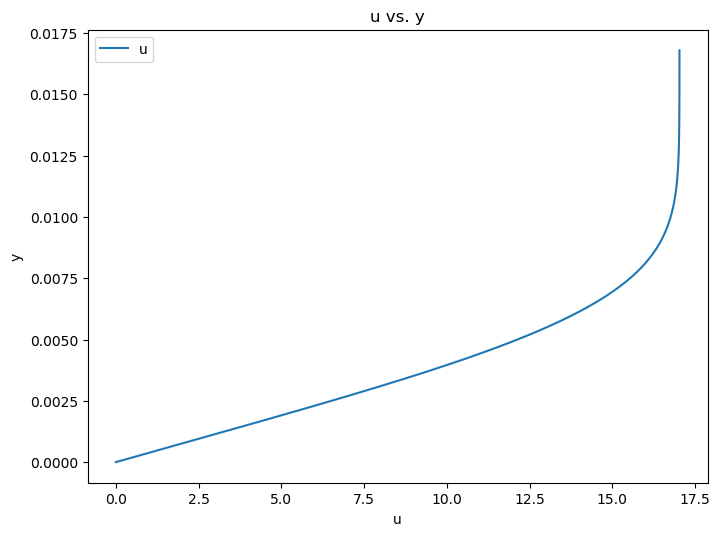

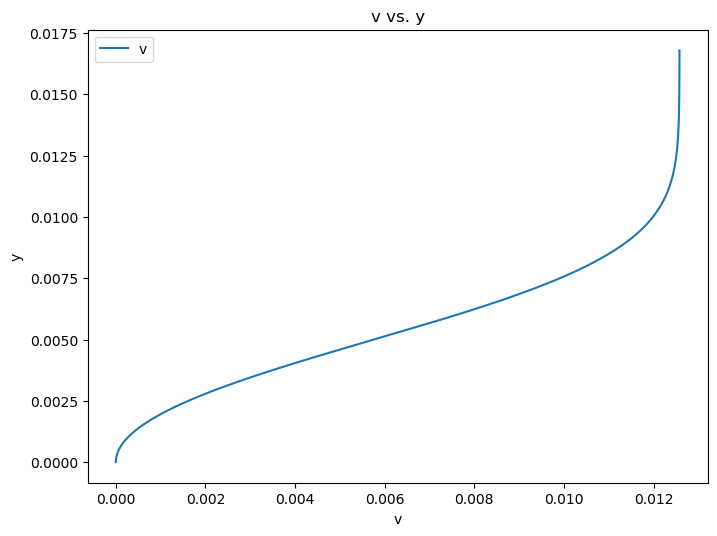

In [10]:
### lets pick x = 5 for the u,v vs y plots
x = 5
eta6 = np.searchsorted(eta, 6) ## index of eta closest to 6 (in this equal to 6)
u = np.zeros_like(eta[:eta6])
v = np.zeros_like(eta[:eta6])
y = np.zeros_like(eta[:eta6])
y[:] = eta[:eta6] / np.sqrt(U_inf/(nu * x) )
u[:] = U_inf * f2[:eta6]
v[:] = np.sqrt(nu * U_inf / x) * (f2[:eta6]*eta[:eta6] - f1[:eta6])
fig1 = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(u, y, label = "u")
plt.title("u vs. y")
plt.legend()
plt.xlabel("u")
plt.ylabel("y")

fig2 = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(v, y, label = "v")
plt.legend()
plt.xlabel("v")
plt.ylabel("y")
plt.title("v vs. y")

We know that $ u = U_{\infty} f'(\eta)$
So, for $u = 99\% \text{of} U_{\infty}, f'(\eta) = 0.99$


In [11]:
eta99 = eta[np.searchsorted(f2, 0.99)] ### finds the index of the first element in a2(which is f'(eta)) greater than 0.99 and
eta99                                  ###  finds corresponding eta  

1.4000000000000001

We know $$\eta = y\sqrt{\frac{\nu U_{\infty}}{  x}}$$

Text(0, 0.5, 'y for u = 0.99 U_inf')

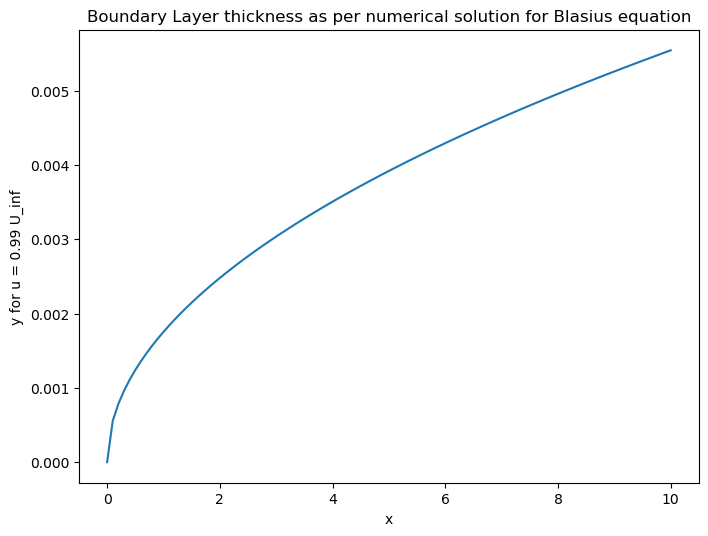

In [12]:

y99 = lambda x : eta99 * np.sqrt( nu * x / U_inf)
x = np.linspace(0, L, 101)
y = np.zeros_like(x)
y[:] = y99(x[:])

fig = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, y)
plt.title("Boundary Layer thickness as per numerical solution for Blasius equation")
plt.xlabel("x")
plt.ylabel("y for u = 0.99 U_inf")

We know that shear at the plate surface is given by
$$
\tau_w = \mu \bigg[U_{\infty} f''(\eta) \sqrt{\frac{U_{\infty}} {\nu x}}\bigg]_{\eta = 0}
$$
$$
\therefore C_{f,numerical} = 2f''(\eta)_{\eta = 0}\frac{\bigg[ \mu U_{\infty}  \sqrt{\frac{U_{\infty}} {\nu x}}\bigg] }{\rho U_{\infty}^2}
$$

In [13]:
f3[0] ## f''(eta = 0)

0.7379051916102292

We have shear at wall from the analytical solution as
$$
\tau_w = 0.332\mu \bigg[U_{\infty}  \sqrt{\frac{U_{\infty}} {\nu x}}\bigg]
$$
We can see that the numerical solution will slightly over estimate the shear force as as such the skin drag
$$
C_{f,analytical} = 0.664\frac{\mu \bigg[U_{\infty}  \sqrt{\frac{U_{\infty}} {\nu x}}\bigg]}{\rho U_{\infty}^2}
$$

In [14]:
@jit(nopython = True)
def Cfnum(x):
    Cf = 2 * f3[0] * nu * np.sqrt(U_inf/(nu * x))/(U_inf)
    return Cf

@jit(nopython = True)
def Cfanalytical(x):
    Cf = 0.664 * nu * np.sqrt(U_inf/(nu * x))/(U_inf)
    return Cf

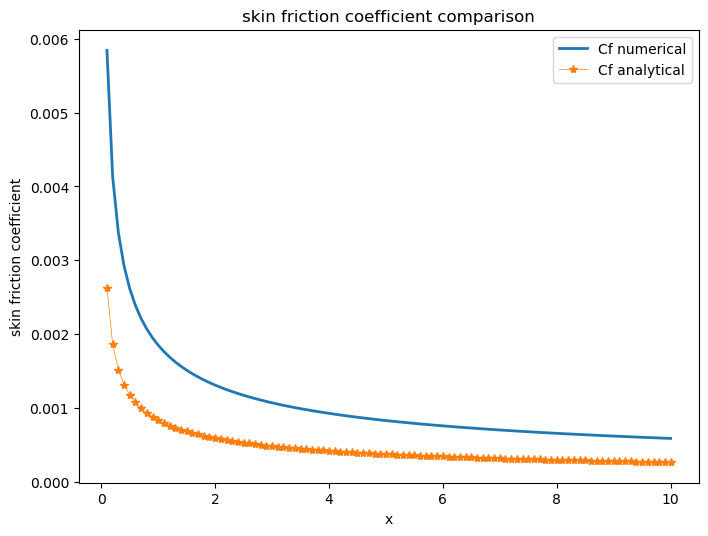

In [15]:
x = np.linspace(0, L, 101)
fig = plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, Cfnum(x), label = "Cf numerical",linewidth = 2)
plt.plot(x, Cfanalytical(x), label = "Cf analytical", linewidth = 0.5, marker ="*")
plt.xlabel("x")
plt.ylabel("skin friction coefficient")
plt.title("skin friction coefficient comparison")
plt.legend()

In [16]:
eta999 = eta[np.searchsorted(f2, 0.999)-1]
eta999, f2[np.searchsorted(f2, 0.999)-1]

(1.41, 0.997924563212207)

In [17]:
len(eta)

2001

In [18]:
minval =1
for i in range(len(f2)):
    if np.abs(f2[i] - 0.999) < minval :
        index = i
        minval = np.abs(f2[i] - 0.999)
eta[index],f2[index]

(1.41, 0.997924563212207)